In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('decisionTree_Data.csv')  # Replace with the correct file path

Summary Statistics:
              Age         Salary   Purchased
count  400.000000     400.000000  400.000000
mean    37.655000   69742.500000    0.357500
std     10.482877   34096.960282    0.479864
min     18.000000   15000.000000    0.000000
25%     29.750000   43000.000000    0.000000
50%     37.000000   70000.000000    0.000000
75%     46.000000   88000.000000    1.000000
max     60.000000  150000.000000    1.000000


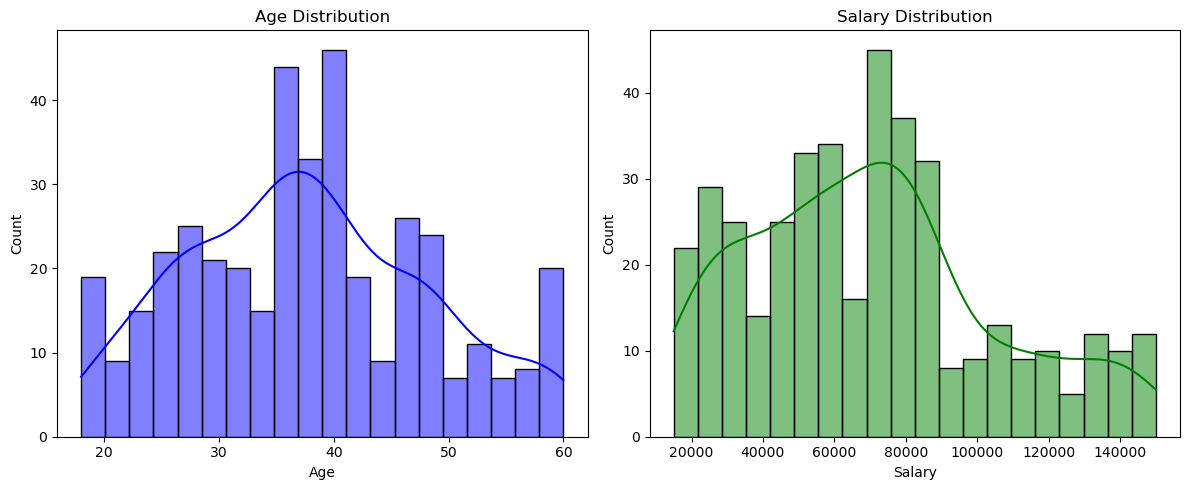

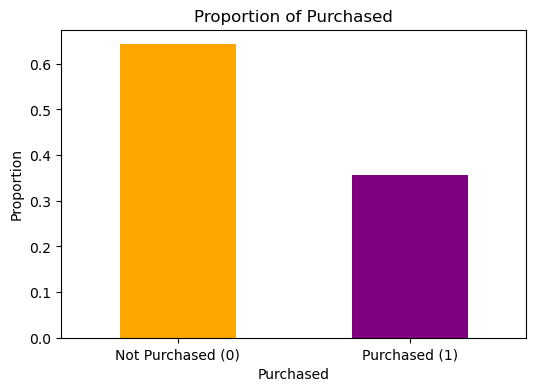

In [3]:
# EDA: Summary Statistics
print("Summary Statistics:")
print(df.describe())

# EDA: Distribution Plots
plt.figure(figsize=(12, 5))

# Age distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')

# Salary distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Salary'], kde=True, bins=20, color='green')
plt.title('Salary Distribution')
plt.xlabel('Salary')

plt.tight_layout()
plt.show()

# Proportion of Purchased
plt.figure(figsize=(6, 4))
purchase_counts = df['Purchased'].value_counts(normalize=True)
purchase_counts.plot(kind='bar', color=['orange', 'purple'], title='Proportion of Purchased')
plt.xticks(ticks=[0, 1], labels=['Not Purchased (0)', 'Purchased (1)'], rotation=0)
plt.ylabel('Proportion')
plt.show()

In [5]:
# Features and target variable
X = df[['Age', 'Salary']]  # Features
y = df['Purchased']        # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Decision Tree Classifier Results:
Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        73
           1       0.81      0.81      0.81        47

    accuracy                           0.85       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.85      0.85      0.85       120



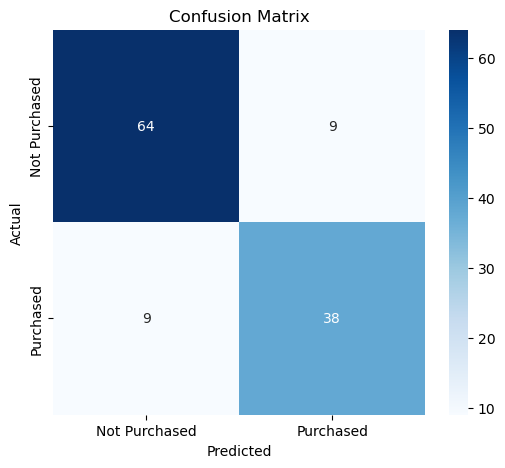

In [7]:
# Train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print("Decision Tree Classifier Results:")
print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:")
print(report)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'],
            yticklabels=['Not Purchased', 'Purchased'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

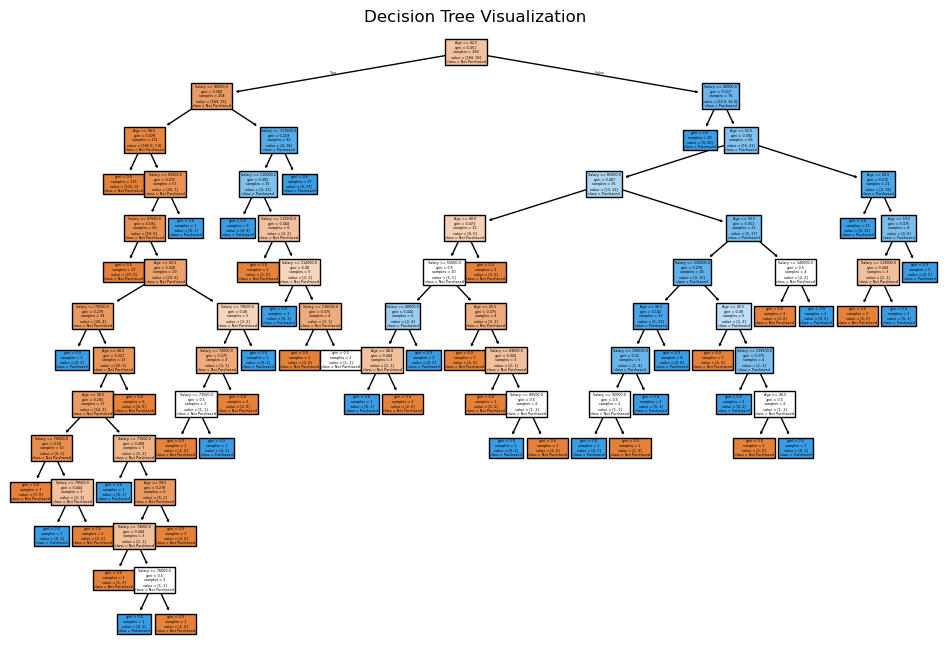

In [9]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=['Age', 'Salary'], class_names=['Not Purchased', 'Purchased'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()